# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     738.4
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           6.76e-39
Time:                        17:54:39   Log-Likelihood:                -3.1686
No. Observations:                  50   AIC:                             14.34
Df Residuals:                      46   BIC:                             21.99
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0678      0.092     55.319      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.56755664  5.03265958  5.4604187   5.82519768  6.11061221  6.31222189
  6.43825978  6.50827972  6.5499437   6.59447707  6.6715383   6.80434617
  7.00586502  7.27667471  7.60487537  7.96804251  8.3369113   8.68018471
  8.9696755   9.18493732  9.316624    9.36802506  9.35452528  9.30107705
  9.23810068  9.19648653  9.20251973  9.27356165  9.41519748  9.62031857
  9.87029037 10.13801405 10.39237877 10.60337304 10.74701561 10.80929546
 10.78847378 10.69536968 10.55158261 10.38594365 10.22977863 10.11176141
 10.05320281 10.06454933 10.14366681 10.27619108 10.43788792 10.59863471
 10.72736946 10.79719425]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.77654829 10.63109206 10.3792728  10.0631295   9.73800024  9.45897353
  9.2674007   9.18077165  9.18843274  9.25419513]


## Plot comparison

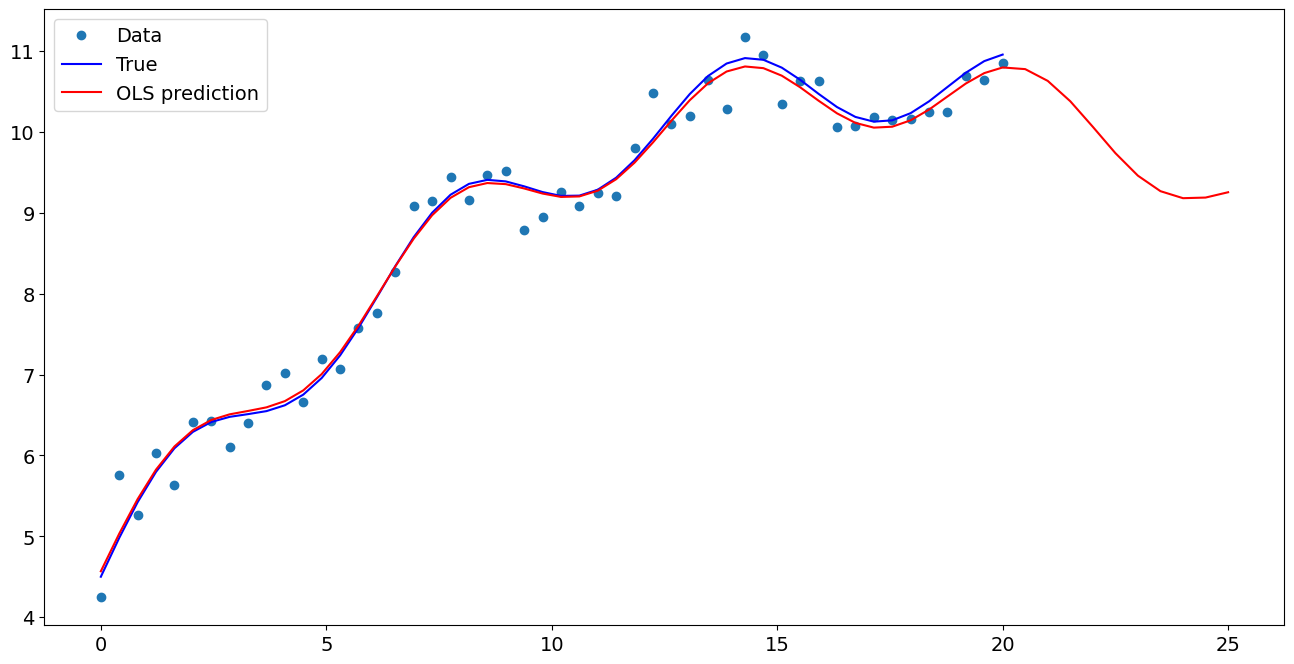

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.067825
x1                  0.490117
np.sin(x1)          0.470399
I((x1 - 5) ** 2)   -0.020011
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.776548
1    10.631092
2    10.379273
3    10.063129
4     9.738000
5     9.458974
6     9.267401
7     9.180772
8     9.188433
9     9.254195
dtype: float64